### Load data

In [1]:
import pandas as pd
import numpy as np
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [2]:
# Load dataset 
df = joblib.load('database_moduli_merged.pkl')

# Define features and target variable
features = joblib.load('features.pkl')
print('No. of features', len(features))

df.head()

No. of features 4053


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,log10G_VRH,log10K_VRH
0,0,0,0,0.000000,1,0.225103,0.033820,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,1.447158,1.707570
1,0,0,0,0.000000,1,0.269189,0.043433,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,1.518514,1.633468
2,-4,3,7,4.107919,1,0.201983,0.032317,-534400.0,0.0,0.95,...,0,0,0,0,0,1,0,0,1.740363,1.908485
3,0,0,0,0.000000,1,0.213451,0.040022,0.0,0.0,0.00,...,0,1,0,0,0,0,0,0,1.707570,2.117271
4,0,0,0,0.000000,1,0.225103,0.034795,0.0,0.0,0.00,...,0,0,0,0,0,1,0,0,1.602060,1.690196


In [3]:
target = 'log10G_VRH'

print(target)
print('Max value:', df[target].max())
print('Min value:', df[target].min())

log10G_VRH
Max value: 2.718501688867274
Min value: 0.0


### Split & Scale Features

In [4]:
!cd

c:\Users\songy\OneDrive\Documents\GBSFS4MPP_local\new_properties\2. vrh_avg_shear (done)


In [5]:
# Split dataset
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42) 

In [6]:
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'

# Save unscaled data
joblib.dump(df_train, path_to_save + 'df_train_' + target + '.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/log10G_VRH_results/df_test_log10G_VRH.pkl']

In [7]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                
                                
# Create pandas.Dataframe of scaled test set using scaler as defined using training set
df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
c:\Users\songy\miniconda3\envs\gbfs\lib\site-packages\pandas\core\frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# Save 
joblib.dump(df_train, path_to_save + 'df_train_' + target + '_scaled.pkl')
joblib.dump(df_test, path_to_save + 'df_test_' + target + '_scaled.pkl')

['C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/log10G_VRH_results/df_test_log10G_VRH_scaled.pkl']

#### GBFS

In [9]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import GBFS as gb

import joblib
import pandas as pd
import numpy as np

In [10]:
# Target
target = 'log10G_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [11]:
# Initialization 
FS = gb.GBFS(
            path_to_file = path_to_file, 
            path_to_save = path_to_save, 
            target = target,
            features = features,
            oversampled_it = False, 
            problem = problem
            )

Name of target column:  log10G_VRH
No. of exploratory features:  4053


In [12]:
# Conduct grid search to perform preliminary scan of the hyperparameter space & retrieve a trained model
FS.run(
        boosting_method = 'lightGBM', 
        cv_folds = 1
        )

Model employed:  lightGBM
Total no. of permutations: 18


   (1 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 30)]
   No. of rows in the training set: 7031
   Metric score:  -0.02050
   [*** Current optimal Hyperparameters ***]
Finished loading model, total used 100 iterations


   (2 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 40)]
   No. of rows in the training set: 7031
   Metric score:  -0.02892


   (3 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.1), ('num_leaves', 50)]
   No. of rows in the training set: 7031
   Metric score:  -0.03686


   (4 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 30)]
   No. of rows in the training set: 7031
   Metric score:  -0.06345


   (5 of 18)  Attempt:  [('n_estimators', 100), ('learning_rate', 0.2), ('num_leaves', 40)]
   No. of rows in the training set: 7031
   Metric score:  -0.09527


   (6 of 18)  Attempt:  [('n_estimato

LGBMRegressor(importance_type='gain', num_leaves=30, objective='regression')

Result saved as: feature_relevance_score_log10G_VRH.pkl
Figure saved as: feature_relevance_plot_log10G_VRH.png


,feature,relevance_score
0,vpa,1942.289594
1,MagpieData_mean_NUnfilled,302.879567
2,max_packing_efficiency,249.355935
3,DemlData_mean_heat_cap,179.868277
4,dimensionality,157.071987
...,...,...
4048,OFM_f12__f11,0.000000
4049,OFM_f12__f12,0.000000
4050,OFM_f12__f13,0.000000
4051,OFM_f12__f14,0.000000


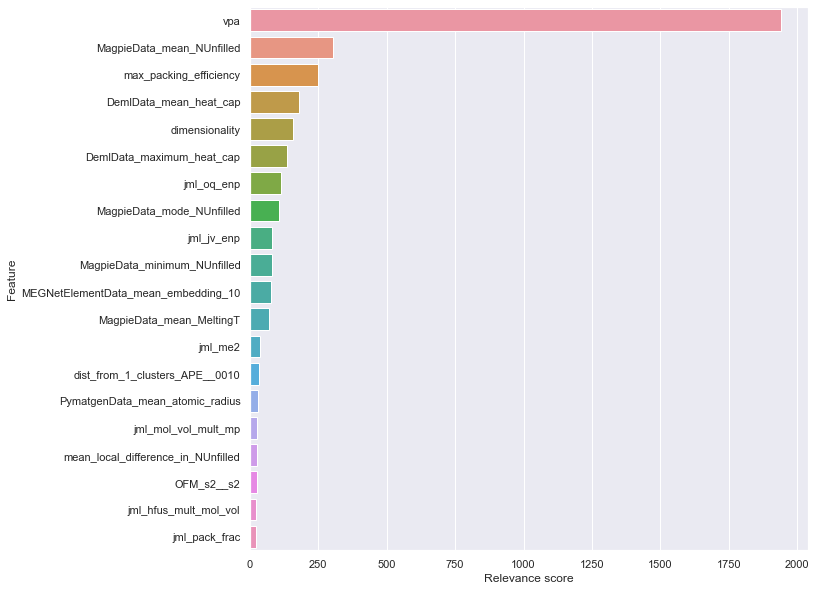

In [13]:
# Obtain feature relevance score
FS.feature_relevance(
                    plot = True, 
                    no_of_features = 20
                    )

In [14]:
# Perform recursive feature selection 
FS.recursive_selection(
                    stratify = False, 
                    oversample_technique = None, 
                    chosen_metric = 'rmse',
                    average = 'weighted',
                    no_to_terminate = 200,
                    max_no_imp = 10
                    )

   No. of rows in training set:  7031
No. of features considering:  1

n=1: mae_train=0.2033, mae_validation=0.2469 
n=1: mse_train=0.0698, mse_validation=0.0907 
n=1: rmse_train=0.2642, rmse_validation=0.3012 
n=1: r2_train=0.4898, r2_validation=0.3397 
n=1: max_error_train=1.5013, max_error_validation=1.2480 
--- 0.22120046615600586 seconds --- 

No. of features considering:  2

n=2: mae_train=0.1547, mae_validation=0.1968 
n=2: mse_train=0.0425, mse_validation=0.0635 
n=2: rmse_train=0.2061, rmse_validation=0.2520 
n=2: r2_train=0.6896, r2_validation=0.5380 
n=2: max_error_train=1.4152, max_error_validation=1.2202 
--- 0.07606911659240723 seconds --- 

No. of features considering:  3

n=3: mae_train=0.1172, mae_validation=0.1776 
n=3: mse_train=0.0243, mse_validation=0.0505 
n=3: rmse_train=0.1560, rmse_validation=0.2247 
n=3: r2_train=0.8221, r2_validation=0.6326 
n=3: max_error_train=1.1713, max_error_validation=0.8443 
--- 0.07807087898254395 seconds --- 

No. of no improvements:

,train_mae,va_mae,train_mse,va_mse,train_rmse,va_rmse,train_r_sq,va_r_sq,train_max_error,va_max_error
no_of_features,,,,,,,,,,
1,0.203268,0.246896,0.069800,0.090745,0.264198,0.301240,0.489817,0.339730,1.501307,1.248017
2,0.154673,0.196804,0.042468,0.063499,0.206077,0.251989,0.689595,0.537980,1.415186,1.220199
3,0.117203,0.177646,0.024339,0.050494,0.156010,0.224709,0.822101,0.632600,1.171288,0.844345
4,0.106251,0.163636,0.020372,0.043016,0.142732,0.207403,0.851095,0.687011,1.137849,0.846983
5,0.103285,0.156931,0.019392,0.039006,0.139253,0.197499,0.858264,0.716190,1.131586,0.835085
...,...,...,...,...,...,...,...,...,...,...
195,0.056712,0.150412,0.005916,0.032521,0.076917,0.180335,0.956757,0.763377,0.498925,0.764618
196,0.056800,0.147001,0.005900,0.031283,0.076810,0.176870,0.956877,0.772381,0.493953,0.774631
197,0.056923,0.163484,0.005965,0.037720,0.077236,0.194215,0.956398,0.725549,0.520976,0.780708


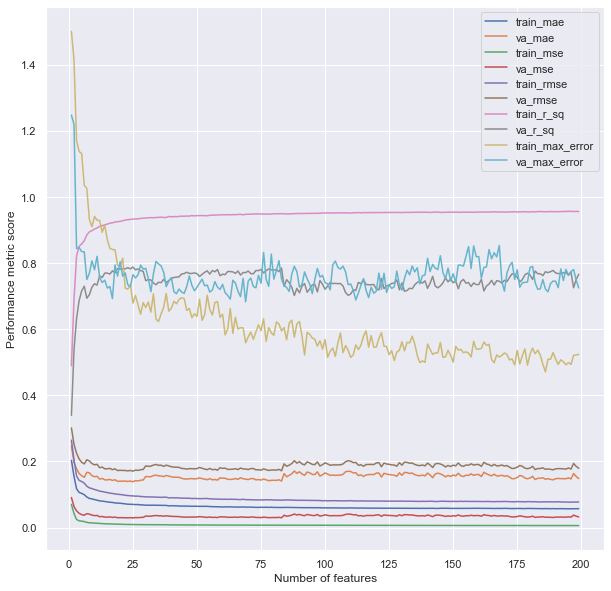

Result saved as: GBFS_convergence_plot_log10G_VRH.pkl


<Figure size 720x720 with 0 Axes>

In [15]:
# Plot the result
FS.convergence_plot()

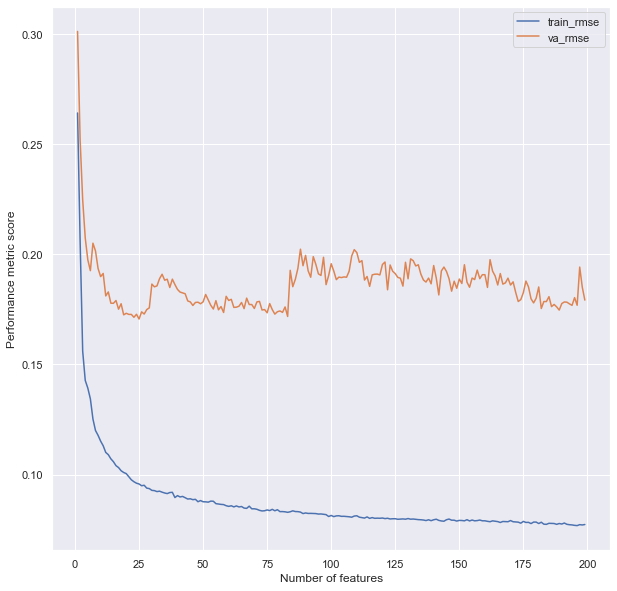

Result saved as: GBFS_convergence_plot_log10G_VRH.pkl


<Figure size 720x720 with 0 Axes>

In [16]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_rmse',
                    validation_metric = 'va_rmse'
                    )

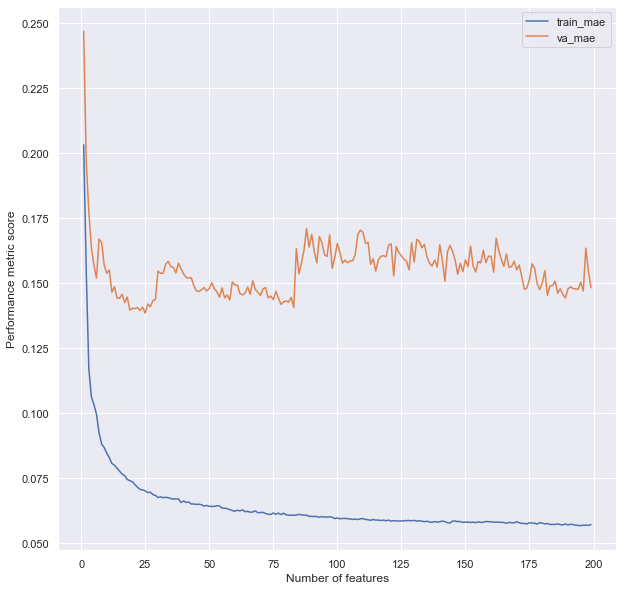

Result saved as: GBFS_convergence_plot_log10G_VRH.pkl


<Figure size 720x720 with 0 Axes>

In [17]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_mae',
                    validation_metric = 'va_mae'
                    )

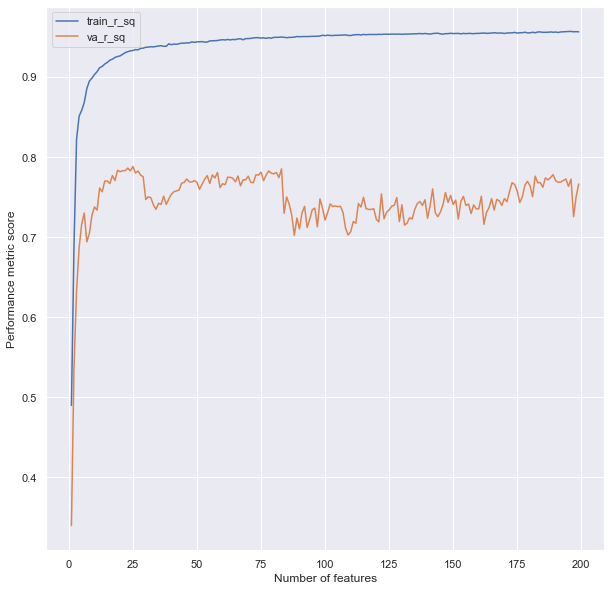

Result saved as: GBFS_convergence_plot_log10G_VRH.pkl


<Figure size 720x720 with 0 Axes>

In [18]:
# Plot the result
FS.convergence_plot(
                    train_metric = 'train_r_sq',
                    validation_metric = 'va_r_sq'
                    )

##### Statistical Analyses - Regression

In [19]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_analyses as fa

import joblib
import pandas as pd
import numpy as np

In [20]:
# Target
target = 'log10G_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_scaled.pkl'

# Either a list or saved file
features = path + 'features.pkl'

problem = 'regression'

In [21]:
# Initialization 
analyses = fa.perform(
                    path_to_file = path_to_file, 
                    path_to_save = path_to_save, 
                    target = target,
                    features = features
                    )

Name of target column:  log10G_VRH
No. of exploratory features:  4053


In [22]:
df = analyses.remove_constant_features()
df.head()

No. of features removed:  239


,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,range_EN_difference,...,LUMO_element_ohe_Zn,LUMO_element_ohe_Zr,crystal_system_ohe_cubic,crystal_system_ohe_hexagonal,crystal_system_ohe_monoclinic,crystal_system_ohe_orthorhombic,crystal_system_ohe_tetragonal,crystal_system_ohe_triclinic,crystal_system_ohe_trigonal,log10G_VRH
5846,1.00,0.000,0.000000,0.000000,0.373969,0.276867,1.000000,0.167102,0.126027,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.792392
5079,1.00,0.000,0.000000,0.000000,0.265772,0.249143,1.000000,0.167102,0.126027,0.00,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.672098
8672,0.50,0.375,0.454545,0.379473,0.231647,0.198242,0.350227,0.375979,0.394521,0.08,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.431364
292,1.00,0.000,0.000000,0.000000,0.411090,0.365413,1.000000,0.167102,0.126027,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.146128
3455,0.25,0.500,0.636364,0.551362,0.090451,0.045225,0.649123,0.321149,0.287671,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.037426


In [23]:
df_anova = analyses.ANOVA_F_test(
                                problem='regression', 
                                all_features=False, 
                                csv=False
                                )

df_anova

There are:
No. of categorical features:  183
No. of numerical features:  3632 

Considering only the numerical features. 

Result saved as:  ANOVA_F_test_result_log10G_VRH_regression.pkl


,feature_names,f_statistic,f_statistic_scaled
0,vpa,7341.795441,1.000000e+00
1,jml_jv_enp,4983.888902,6.788379e-01
2,jml_oq_enp,4742.693456,6.459855e-01
3,MagpieData_mean_GSvolume_pa,4162.501644,5.669596e-01
4,jml_bp_divi_mol_vol,3929.587773,5.352353e-01
...,...,...,...
3627,OFM_f12__d2,0.000039,4.885864e-09
3628,OFM_f9__d2,0.000005,2.772167e-10
3629,ReDF_1335000__1340000A,0.000004,2.052007e-10
3630,OFM_d2__f9,0.000004,1.833112e-10


In [24]:
df_mi = analyses.mutual_information(
                                problem='regression', 
                                csv=False
                                )

df_mi

There are:
No. of categorical features:  183
No. of numerical features:  3632 

Result saved as: MI_result_log10G_VRH.pkl


,feature_names,MI,MI_scaled
0,MagpieData_mode_Number,0.510911,1.000000
1,MagpieData_mode_AtomicWeight,0.497672,0.974086
2,MagpieData_mode_MendeleevNumber,0.492736,0.964427
3,MagpieData_mode_MeltingT,0.447599,0.876079
4,MagpieData_mode_GSvolume_pa,0.446165,0.873274
...,...,...,...
3542,OFM_d9__p1,0.000000,0.000000
3541,OFM_d9__f9,0.000000,0.000000
3540,OFM_d9__f7,0.000000,0.000000
3539,OFM_d9__f6,0.000000,0.000000


#### Feature Engineering 

In [25]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import feature_engineering as fe

import joblib
import pandas as pd
import numpy as np

In [26]:
# Target
target = 'log10G_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path + 'database_moduli_merged.pkl'  # all data

# Either a list or saved file for the features
features = path + 'features.pkl'

problem = 'regression'

In [27]:
# Top n features from ANOVA 
df_anova = joblib.load(path_to_save + 'ANOVA_F_test_result_' + target + '_regression.pkl')

# Top n features
n = 5
anova_features = df_anova['feature_names'].tolist()[:n]

df_anova.iloc[:n, :]

,feature_names,f_statistic,f_statistic_scaled
0,vpa,7341.795441,1.000000
1,jml_jv_enp,4983.888902,0.678838
2,jml_oq_enp,4742.693456,0.645986
3,MagpieData_mean_GSvolume_pa,4162.501644,0.566960
4,jml_bp_divi_mol_vol,3929.587773,0.535235


In [28]:
# Top n features from MI 
df_mi = joblib.load(path_to_save + 'MI_result_' + target + '.pkl')

# Top n features
n = 5
mi_features = df_mi['feature_names'].tolist()[:n]

df_mi.iloc[:n, :]

,feature_names,MI,MI_scaled
0,MagpieData_mode_Number,0.510911,1.000000
1,MagpieData_mode_AtomicWeight,0.497672,0.974086
2,MagpieData_mode_MendeleevNumber,0.492736,0.964427
3,MagpieData_mode_MeltingT,0.447599,0.876079
4,MagpieData_mode_GSvolume_pa,0.446165,0.873274


In [29]:
# Top n features from GBFS
df_gbfs = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')

# Top n features
n = 5
gbfs_features = df_gbfs['feature'].tolist()[:n]

df_gbfs.iloc[:n, :]

,feature,relevance_score
0,vpa,1942.289594
1,MagpieData_mean_NUnfilled,302.879567
2,max_packing_efficiency,249.355935
3,DemlData_mean_heat_cap,179.868277
4,dimensionality,157.071987


In [30]:
# Initialization
perform = fe.engineering(
                        path_to_file = path_to_file, 
                        path_to_save = path_to_save, 
                        target = target,
                        features = features
                        )

Name of target column:  log10G_VRH
No. of exploratory features:  4053


In [31]:
# Join the features
feature_list = anova_features + mi_features + gbfs_features

print(len(feature_list))
print(feature_list)

15
['vpa', 'jml_jv_enp', 'jml_oq_enp', 'MagpieData_mean_GSvolume_pa', 'jml_bp_divi_mol_vol', 'MagpieData_mode_Number', 'MagpieData_mode_AtomicWeight', 'MagpieData_mode_MendeleevNumber', 'MagpieData_mode_MeltingT', 'MagpieData_mode_GSvolume_pa', 'vpa', 'MagpieData_mean_NUnfilled', 'max_packing_efficiency', 'DemlData_mean_heat_cap', 'dimensionality']


In [32]:
# Perform feature engineering
df, new_cols = perform.brute_force(feature_list = feature_list)

df.head()

,minimum_oxidation_state,maximum_oxidation_state,range_oxidation_state,std_dev_oxidation_state,compound_possible,max_ionic_char,avg_ionic_char,avg_anion_electron_affinity,minimum_EN_difference,maximum_EN_difference,...,DemlData_mean_heat_cap/MagpieData_mean_NUnfilled,MagpieData_mean_NUnfilled/dimensionality,dimensionality/MagpieData_mean_NUnfilled,max_packing_efficiency/DemlData_mean_heat_cap,DemlData_mean_heat_cap/max_packing_efficiency,max_packing_efficiency/dimensionality,dimensionality/max_packing_efficiency,DemlData_mean_heat_cap/dimensionality,dimensionality/DemlData_mean_heat_cap,log10G_VRH
0,0,0,0,0.000000,1,0.225103,0.033820,0.0,0.0,0.00,...,12.30690,0.666667,1.500,0.020937,47.761898,0.171781,5.821356,8.204600,0.121883,1.447158
1,0,0,0,0.000000,1,0.269189,0.043433,0.0,0.0,0.00,...,15.53100,0.533333,1.875,0.021295,46.960406,0.176387,5.669356,8.283200,0.120726,1.518514
2,-4,3,7,4.107919,1,0.201983,0.032317,-534400.0,0.0,0.95,...,11.48580,0.666667,1.500,0.023869,41.894637,0.182773,5.471274,7.657200,0.130596,1.740363
3,0,0,0,0.000000,1,0.213451,0.040022,0.0,0.0,0.00,...,0.00000,0.333333,3.000,0.000000,0.000000,0.246827,4.051423,0.000000,0.000000,1.707570
4,0,0,0,0.000000,1,0.225103,0.034795,0.0,0.0,0.00,...,14.67325,0.533333,1.875,0.021798,45.875773,0.170585,5.862169,7.825733,0.127784,1.602060


In [33]:
perform.save()

Result saved as: df_log10G_VRH_engineered_features.pkl
Result saved as: features_log10G_VRH_engineered.pkl
Result saved as: df_train_log10G_VRH_engineered.pkl
Result saved as: df_test_log10G_VRH_engineered.pkl


#### Multi-Collinearity Reduction

In [34]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import multicollinearity_reduction as mr

import joblib
import pandas as pd
import numpy as np

In [35]:
# Target
target = 'log10G_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
n = 75 # Most relevant features defined using the GBFS result
gbfs_cols = joblib.load(path_to_save + 'feature_relevance_score_' + target + '.pkl')['feature'].tolist()[:n]
new_cols = joblib.load(path_to_save + 'features_' + target + '_engineered.pkl')
features = gbfs_cols + new_cols

problem = 'regression'

print(len(gbfs_cols))
print(len(new_cols))
len(features)

75
182


257

In [36]:
# Initialize module with path_to_file and path_to_save
data = mr.multicollinearity_reduction(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features 
                                        )

Name of target column:  log10G_VRH
No. of exploratory features:  257


In [37]:
# Remove features with correlation coeff greather than the threshold
col_corr = data.correlation_analysis(threshold = 0.85)
new_features = data.apply_correlation_filter()

Identified correlated features
No. of features remaining:  128
Features saved as: features_selected_from_correlation_analysis_log10G_VRH.pkl


Figure saved as: Dendrogram_log10G_VRH.png


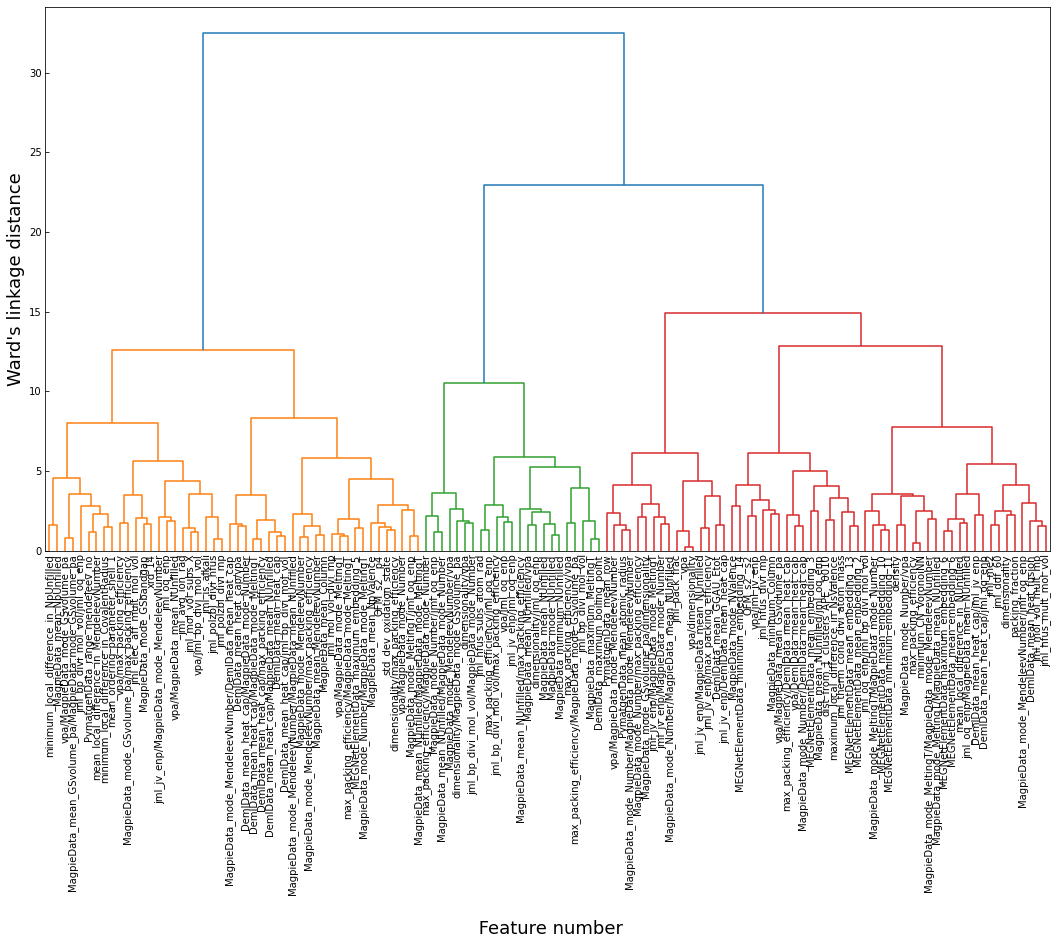

In [38]:
# Perform hierarchical cluster analysis & create the corresponding dendrogram 
data.hierarchical_cluster_analysis()

In [39]:
# Select features based on the given linkage threshold
threshold_list = [1, 2, 3, 4, 5]

for i in threshold_list:
    final_features = data.apply_linkage_threshold(threshold = i)

Number of features remaining:  116
Features saved as features_selected_from_hierarchical_analysis_log10G_VRH_threshold_1.pkl
Number of features remaining:  69
Features saved as features_selected_from_hierarchical_analysis_log10G_VRH_threshold_2.pkl
Number of features remaining:  39
Features saved as features_selected_from_hierarchical_analysis_log10G_VRH_threshold_3.pkl
Number of features remaining:  26
Features saved as features_selected_from_hierarchical_analysis_log10G_VRH_threshold_4.pkl
Number of features remaining:  18
Features saved as features_selected_from_hierarchical_analysis_log10G_VRH_threshold_5.pkl


#### Recursive Feature Elimination

In [40]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import recursive_feature_elimination as rfe

import joblib
import pandas as pd

In [41]:
# Target
target = 'log10G_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_3.pkl')

scaled = False

problem = 'regression'

In [42]:
# Initialize module with path_to_file and path_to_save
run = rfe.recursive_feature_elimination(
                                        path_to_file, 
                                        path_to_save, 
                                        target=target,
                                        features = features,
                                        scaled = False,
                                        problem = problem
                                        )

Target: log10G_VRH
No. of features: 39


In [43]:
# Run RFE
estimator = run.base_model(boosting_method = 'lightGBM')
RFE_features = run.perform()

Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 fe

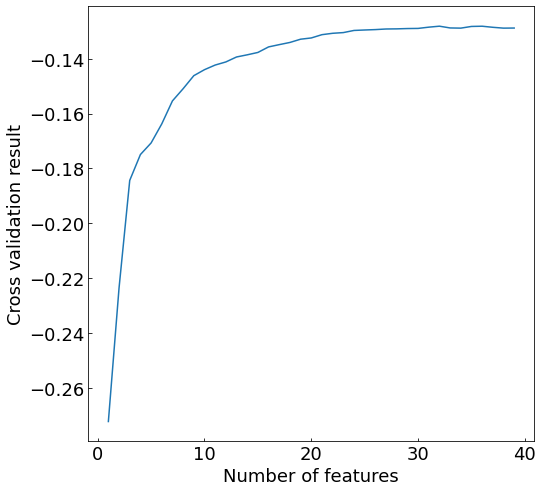

Figure saved as: RFE_plot_log10G_VRH.png


In [44]:
# Plot figure
run.RFE_plot()

#### Test Dummy Model 
###### (Before optimization)

In [45]:
### test result to find best threshold

import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from lightgbm.sklearn import LGBMRegressor

In [46]:
# Target
target = 'log10G_VRH'

# Path to training data
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'
path_to_file = path_to_save + 'df_train_' + target + '_engineered.pkl'

# Data
df_train = joblib.load(path_to_save + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path_to_save + 'df_test_' + target + '_engineered.pkl')

# Features 
features = joblib.load(path_to_save + 'features_selected_from_hierarchical_analysis_' + target + '_threshold_3.pkl')
scaled = False
print('No. of features:', len(features))

problem = 'regression'

No. of features: 39


In [47]:
# Scale the features
scaling = MinMaxScaler(feature_range=(0, 1))

df_train[features] = pd.DataFrame(
                                    scaling.fit_transform(df_train[features].values),
                                    columns=df_train[features].columns,
                                    index=df_train[features].index
                                )
                                

df_test[features] = pd.DataFrame(
                                    scaling.transform(df_test[features].values),
                                    columns=df_test[features].columns,
                                    index=df_test[features].index
                                )

In [48]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective='regression',
                    importance_type='gain',
                    learning_rate=0.1,
                    n_estimators=350,
                    num_leaves=40,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', n_estimators=350, num_leaves=40,
              objective='regression', random_state=42)

In [49]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [50]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 2.4456042032735974
Min value: 0.0


In [51]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 3

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.08)

        # line of best fit
        linear_fit = np.linspace(0, max_value, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(0, max_value, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(0, max_value, 5)

        ax_scatter.set_xlabel('DFT Calculation of log$_{10}$($K_{VRH}$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of log$_{10}$($K_{VRH}$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(-0.25, max_value+0.25)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(-0.135, max_value+0.15)
        ax_hist_x.set_xticks([0, 60, 120])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(-0.25, max_value+0.25)
        ax_hist_y.set_yticks([0, 60, 120])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(1.85, 2.5, r'$y = x$', fontdict=font1)
        ax_scatter.text(2.3, 1.9, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        ax_scatter.text(1.6, 0.24, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(1.6, 0.1, r'$MAE$ = ' + str(round(mae,3)) + ' log$_{10}$(GPa)', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(1.6, -0.05, r'$RMSE$ = ' + str(round(mse,3)) + ' log$_{10}$(GPa)', fontdict=font3)

        #final_figure
        #fig.savefig('final_regression_mag_v1.png', dpi = 500, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.026e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        19:36:16   Log-Likelihood:                 1704.5
No. Observations:                2198   AIC:                            -3405.
Df Residuals:                    2196   BIC:                            -3394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1597      0.010     15.

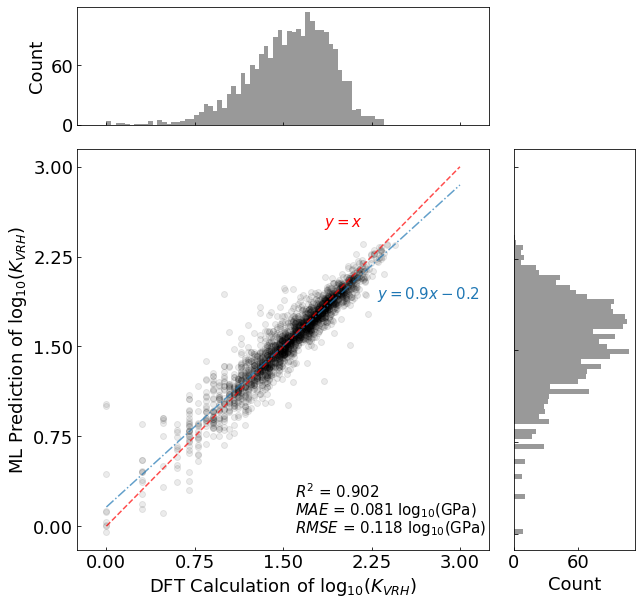

m =  0.8960931631325842
c =  0.1597246447768426 

MAE:  0.08130586727397976
MSE:  0.01395722232118016
RMSE:  0.11814068867744153
R-squared:  0.9021566161394164
Max error:  1.0221719346228286
Explained_variance_score:  0.9021736810690701


In [52]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

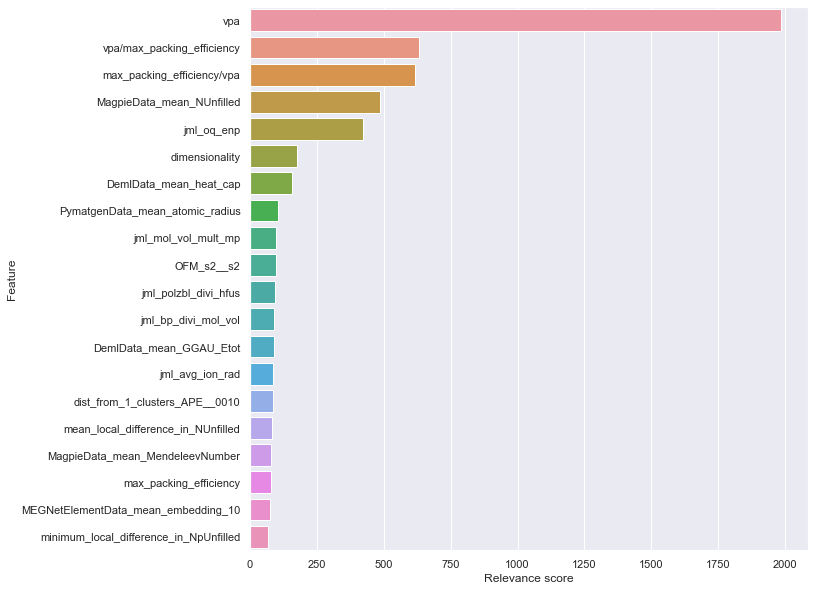

In [53]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)


#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})

# Number of features to plot
no_of_features = 20

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

#### Bayesian Optimization 

In [54]:
import sys
sys.path.insert(1, 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties')

import optimization as opt

import joblib
import pandas as pd
import numpy as np

In [55]:
# Target
target = 'log10G_VRH'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path_to_save = path + target + '_results/'

# Path to training data
path_to_train_data = path_to_save + 'df_train_' + target + '_engineered.pkl'
path_to_test_data = path_to_save + 'df_test_' + target + '_engineered.pkl'

path_to_features = path_to_save + 'features_selected_from_RFE_' + target + '.pkl' 

problem = 'regression'

scaled = False

In [56]:
# Initialization
final_stage = opt.optimization(
                            path_to_train_data = path_to_train_data,
                            path_to_test_data = path_to_test_data,
                            path_to_save = path_to_save,
                            features = path_to_features,
                            target = target,
                            problem = problem,
                            scaled = scaled
                            )

Name of target column:  log10G_VRH
No. of exploratory features:  32


In [57]:
# Choose ML model
final_stage.base_model(boosting_method = 'lightGBM')

LGBMRegressor(importance_type='gain', random_state=42)

In [58]:
# Define hyperparameters; range should be edited directly from the script
final_stage.set_hyperparameters()

(['learning_rate', 'n_estimators', 'num_leaves'],
 [Real(low=0.01, high=1.0, prior='log-uniform', transform='identity'),
  Integer(low=100, high=800, prior='uniform', transform='identity'),
  Integer(low=10, high=100, prior='uniform', transform='identity')])

In [59]:
# optimization_method: dummy_minimize, gp_minimize, gbrt_minimize, forest_minimize
final_stage.run(optimization_method = 'bayesian')

Iteration No: 1 started. Evaluating function at random point.

 {'learning_rate': 0.4396507787004078, 'n_estimators': 130, 'num_leaves': 45} 

Score:  0.13796316326569386 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.4478
Function value obtained: 0.1380
Current minimum: 0.1380
Iteration No: 2 started. Evaluating function at random point.

 {'learning_rate': 0.06617687965337896, 'n_estimators': 691, 'num_leaves': 45} 

Score:  0.12252161269581788 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 3.2650
Function value obtained: 0.1225
Current minimum: 0.1225
Iteration No: 3 started. Evaluating function at random point.

 {'learning_rate': 0.18019437149345688, 'n_estimators': 700, 'num_leaves': 26} 

Score:  0.12560126703620064 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.4153
Function value obtained: 0.1256
Current minimum: 0.1225
Iteration No: 4 started. Evaluating function at random point.

 {'learning_rate': 0.01

Saved: Optimisation_result_log10G_VRH.png


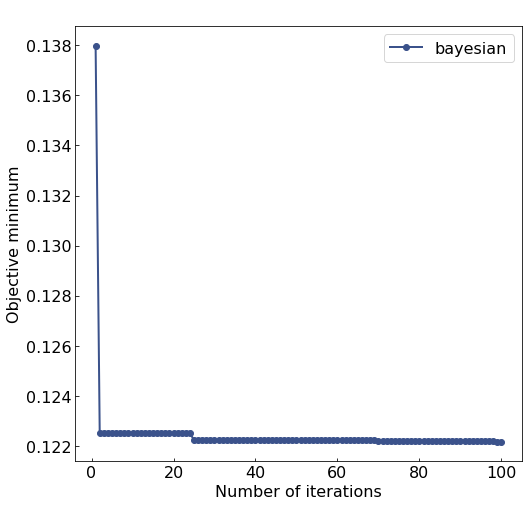

In [60]:
# Plot convergence plot
final_stage.convergence_plot()

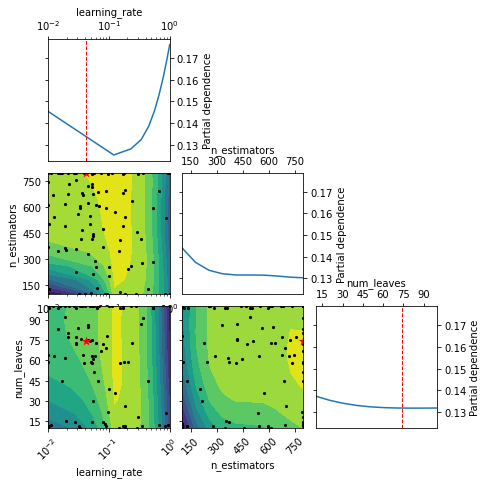

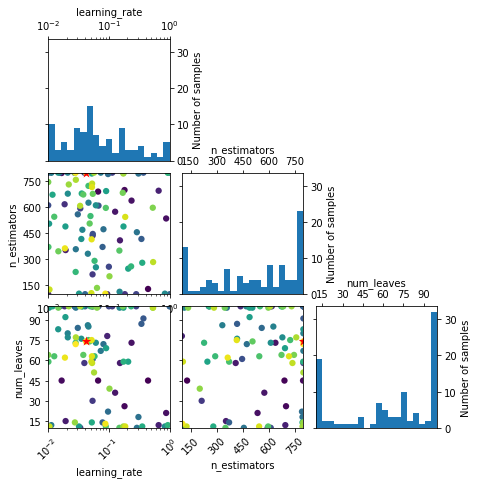

In [61]:
# objective and evaluation plot
final_stage.objective_plot()

In [62]:
# Train model with optimal hyperparameter identified
final_stage.train_model()

LGBMRegressor(importance_type='gain', learning_rate=0.041775131740437524,
              n_estimators=800, num_leaves=74, random_state=42)

                            OLS Regression Results                            
Dep. Variable:            pred_target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                 2.106e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        19:42:47   Log-Likelihood:                 1743.3
No. Observations:                2198   AIC:                            -3483.
Df Residuals:                    2196   BIC:                            -3471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1568      0.010     15.867      0.0

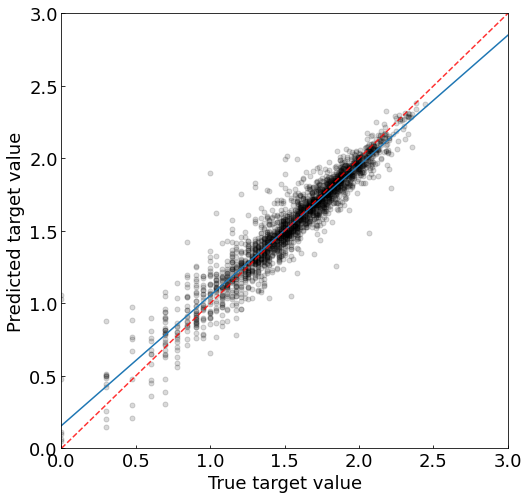

Saved: regression_plot_log10G_VRH.png


In [63]:
# Evaluate model using test set
final_stage.evaluate(
                    strategy = 'weighted', 
                    adjusted = False, 
                    max_value = 3,
                    min_value = 0
                    )


### Final Figure

In [64]:
import pandas as pd
import numpy as np
import joblib
import statsmodels.api as sm
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, max_error
from sklearn.metrics import explained_variance_score,mean_squared_error

from lightgbm.sklearn import LGBMRegressor

In [65]:
# Target
target = 'log10G_VRH'

# Path
path = 'C:/Users/Songy/OneDrive/Documents/GBSFS4MPP_local/new_properties/2. vrh_avg_shear (done)/'
path2 = path + target + '_results/'
path_to_save = path + 'log10K_VRH_results_backup/'

# Features
features = joblib.load(path2 + 'features_selected_from_RFE_' + target + '.pkl')

# Path to training data
df_train = joblib.load(path2 + 'df_train_' + target + '_engineered.pkl')
df_test = joblib.load(path2 + 'df_test_' + target + '_engineered.pkl')

problem = 'regression'

scaled = False

In [66]:
lgbm = LGBMRegressor(
                    boosting_type ='gbdt',
                    objective=problem,
                    importance_type='gain',
                    learning_rate=0.041775131740437524,
                    n_estimators=800,
                    num_leaves=74,
                    max_depth=-1,
                    random_state=42
                    )

lgbm.fit(df_train[features], df_train[target].values.ravel())
lgbm

LGBMRegressor(importance_type='gain', learning_rate=0.041775131740437524,
              n_estimators=800, num_leaves=74, objective='regression',
              random_state=42)

In [67]:
# Predict
predicted_target = lgbm.predict(df_test[features])

# Generate table of results
id_index = df_test.index.tolist()

df_pred = pd.DataFrame({'task_id': id_index,
                        'act_lambda_max': df_test[target].values.reshape(1, -1).ravel(),
                        'pred_lambda_max': predicted_target
                        })

# Eliminate zeros (?)
df_pred['adj_pred_lambda_max'] = df_pred['pred_lambda_max']
df_pred['adj_pred_lambda_max'] = df_pred['adj_pred_lambda_max'].apply(lambda x: 0 if x < 0 else x)

# Define variables
y_test = df_pred['act_lambda_max']
y_pred_adj = df_pred['adj_pred_lambda_max']
y_pred = df_pred['pred_lambda_max']

In [68]:
print('Max value:', df_test[target].max())
print('Min value:', df_test[target].min())

Max value: 2.4456042032735974
Min value: 0.0


In [69]:
def plot(df_pred, adj=True):
        # Plot results
        max_value = 3

        X = df_pred['act_lambda_max']
        if adj is True:
                Y = df_pred['adj_pred_lambda_max']
        else:
                Y = df_pred['pred_lambda_max']

        # Stats
        results = sm.OLS(Y,sm.add_constant(X)).fit()
        print(results.summary())

        # Figure
        fig = plt.figure(figsize=(10, 10)) #, dpi=100, facecolor='w', edgecolor='k')
        gs = GridSpec(4, 4)

        ax_scatter = fig.add_subplot(gs[1:4, 0:3])
        ax_hist_y = fig.add_subplot(gs[0,0:3])
        ax_hist_x = fig.add_subplot(gs[1:4, 3])


        fontsize = 18

        # Predicted vs Actual
        ax_scatter.plot(X, Y, 'o', markersize=6, color='black', alpha=0.08)

        # line of best fit
        linear_fit = np.linspace(0, max_value, max_value)
        ax_scatter.plot(linear_fit, linear_fit*results.params[1] + results.params[0], '-.', color='tab:blue', alpha=0.7)

        # Ideal y=x 
        y = x = np.linspace(0, max_value, max_value)
        ax_scatter.plot(x, y, '--', color='red', alpha=0.7)

        ticks = np.linspace(0, max_value, 5)

        ax_scatter.set_xlabel('DFT Calculation of log$_{10}$($G_{VRH}$)', fontsize=fontsize)
        ax_scatter.set_ylabel('ML Prediction of log$_{10}$($G_{VRH}$)', fontsize=fontsize)
        ax_scatter.tick_params(axis='both', which='both', labelsize=fontsize, direction="in")
        ax_scatter.set_xlim(-0.25, max_value+0.25)
        ax_scatter.set_xticks(ticks)
        ax_scatter.set_yticks(ticks)

        ax_hist_x.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelleft=False)
        ax_hist_x.set_xlabel('Count', fontsize=fontsize)
        ax_hist_x.set_ylim(-0.135, max_value+0.15)
        ax_hist_x.set_xticks([0, 55, 110])
        ax_hist_x.set_yticks(ticks)

        ax_hist_y.tick_params(axis='both', which='both', labelsize=fontsize, direction="in", labelbottom=False)
        ax_hist_y.set_ylabel('Count', fontsize=fontsize)
        ax_hist_y.set_xlim(-0.25, max_value+0.25)
        ax_hist_y.set_yticks([0, 60, 120])
        ax_hist_y.set_xticks(ticks)

        # Distribution plots
        alpha = 0.4
        histtype = 'bar' #'step' bar
        color = 'black' #'tab:grey'
        bins = 60 #70

        ax_hist_y.hist(
                        y_pred_adj, 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )
        ax_hist_x.hist(
                        y_test, 
                        orientation='horizontal', 
                        bins=bins, 
                        color=color, 
                        histtype=histtype,
                        alpha=alpha
                        )


        #Text in figure
        font1 = {'family': 'DejaVu Sans',
                'color':  'red',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font2 = {'family': 'DejaVu Sans',
                'color':  'tab:blue',
                'weight': 'normal',
                'size': fontsize-3,
                }

        font3 = {'family': 'DejaVu Sans', #'serif',
                'color':  'black',
                'weight': 'normal',
                'size': fontsize-3,
                }

        ax_scatter.text(1.85, 2.5, r'$y = x$', fontdict=font1)
        ax_scatter.text(2.3, 1.9, r'$y = ' + str(round(results.params[1],1)) + 'x - ' + str(round(results.params[0],1)) + '$', fontdict=font2)

        r2 = r2_score(X, Y)
        ax_scatter.text(1.6, 0.24, r'$R^{2}$ = ' + str(round(r2,3)), fontdict=font3)

        mae = mean_absolute_error(X, Y)
        ax_scatter.text(1.6, 0.1, r'$MAE$ = ' + str(round(mae,3)) + ' log$_{10}$(GPa)', fontdict=font3)

        mse = mean_squared_error(X, Y, squared=False)
        ax_scatter.text(1.6, -0.05, r'$RMSE$ = ' + str(round(mse,3)) + ' log$_{10}$(GPa)', fontdict=font3)

        #final_figure
        fig.savefig(path_to_save + 'final_reg_shear_modulus.png', dpi = 300, bbox_inches="tight")

        plt.show()

        print('m = ', results.params[1])
        print('c = ', results.params[0], '\n')

        print('MAE: ', mean_absolute_error(X, Y))
        print('MSE: ', mean_squared_error(X, Y))
        print('RMSE: ', mean_squared_error(X, Y, squared=False))
        print('R-squared: ', r2_score(X, Y))
        print('Max error: ', max_error(X, Y))
        print('Explained_variance_score: ', explained_variance_score(X, Y, multioutput='variance_weighted'))

                            OLS Regression Results                            
Dep. Variable:        pred_lambda_max   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                 2.053e+04
Date:                Mon, 01 Aug 2022   Prob (F-statistic):               0.00
Time:                        00:50:12   Log-Likelihood:                 1720.5
No. Observations:                2198   AIC:                            -3437.
Df Residuals:                    2196   BIC:                            -3426.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1603      0.010     16.

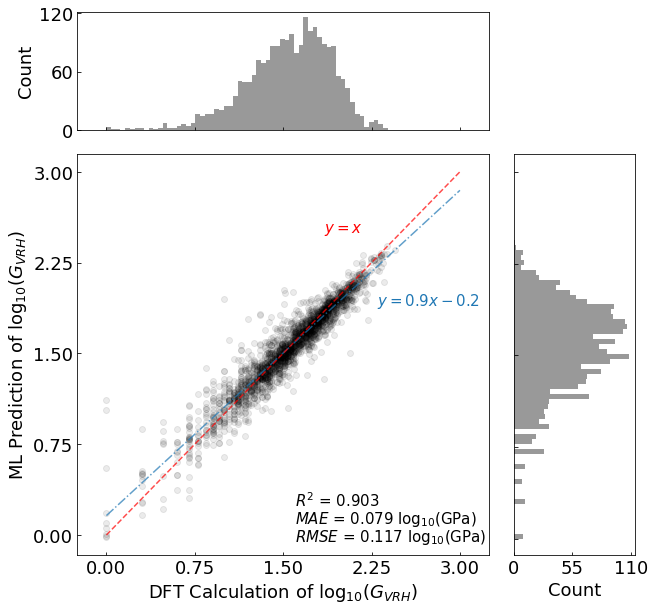

m =  0.8955396519867178
c =  0.16025679420644504 

MAE:  0.07888957036939767
MSE:  0.013795830767537336
RMSE:  0.11745565447238944
R-squared:  0.9032880085734947
Max error:  1.1152185673603239
Explained_variance_score:  0.9033129766068795


In [70]:
plot(df_pred, adj=False)

[Text(0.5, 0, 'Relevance score'), Text(0, 0.5, 'Feature')]

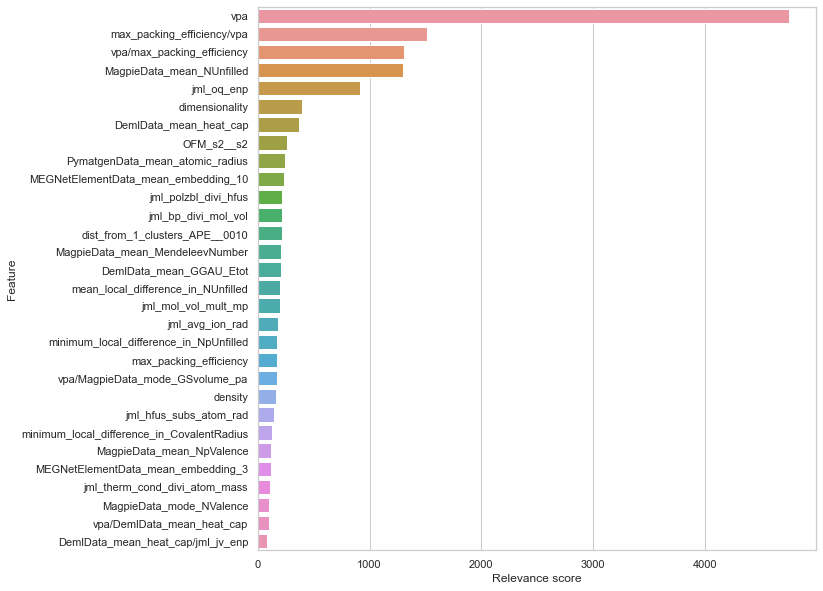

In [71]:
import seaborn as sns

# Generate feature ranking
model = lgbm

feature_score = pd.DataFrame({'feature': features, 'relevance_score': model.feature_importances_})
feature_score = feature_score.sort_values(by = 'relevance_score', ascending = False)
feature_score = feature_score.reset_index(drop = True)

#Plot data of feature relevance 
sns.set(rc = {'figure.figsize':(10, 10)})
sns.set_style("whitegrid")

# Number of features to plot
no_of_features = 30

fig = sns.barplot(x = 'relevance_score', y = 'feature', data = feature_score[:no_of_features])
fig.set(xlabel = 'Relevance score', ylabel = 'Feature')

# plt.savefig('feature_relevance_plot_experimental_bayesian_scaffold_split_v2.png', dpi = 300)